In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
customers = pd.read_json('dim_customer.json')
customers

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [9]:
invoices = pd.read_csv('fct_invoice.csv')
invoices

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [13]:
sales_data = pd.merge(customers, invoices, left_on='id', right_on='customer_id')
sales_data

,age,first_name,gender,id,last_name,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,48.0,Nicholas,M,0,Flores,I254078,0,Shoes,3,1800.51,Cash,28/05/2021,Kanyon
1,48.0,Nicholas,M,0,Flores,I387354,0,Shoes,1,600.17,Cash,7/4/2021,Kanyon
2,48.0,Nicholas,M,0,Flores,I170558,0,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM
3,48.0,Nicholas,M,0,Flores,I187874,0,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul
4,48.0,Nicholas,M,0,Flores,I171870,0,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,9428,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul
99453,NaN,David,M,9494,Roy,I203211,9494,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity
99454,85.0,Thomas,M,10350,Turner,I325731,10350,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM
99455,NaN,April,F,10587,Sanchez,I478078,10587,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity


EASY

1. How many unique customers are in the dataset?

In [17]:
sales_data['id'].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [20]:
sales_data['category'].unique()

array(['Shoes', 'Cosmetics', 'Books', 'Toys', 'Clothing',
       'Food & Beverage', 'Technology', 'Souvenir'], dtype=object)

In [22]:
sales_data['category'].nunique()

8

3. Which payment method is the most popular? How many times was it used?

In [103]:
sales_data.groupby('payment_method')['payment_method'].count().index[0]

'Cash'

In [107]:
sales_data.groupby('payment_method')['payment_method'].count().iloc[0]

44447

AVERAGE

1. What are the three most popular categories, by total sales?

In [249]:
sales_data['total_sales'] = sales_data['price'] * sales_data['quantity']
sales_data.groupby('category')['total_sales'].sum().sort_values(ascending=False).iloc[0:3]

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

2. What are the total sales attributed to customers over the age of 45?

In [251]:
sales_data[sales_data['age']>45]['total_sales'].sum()

82039768.14999999

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

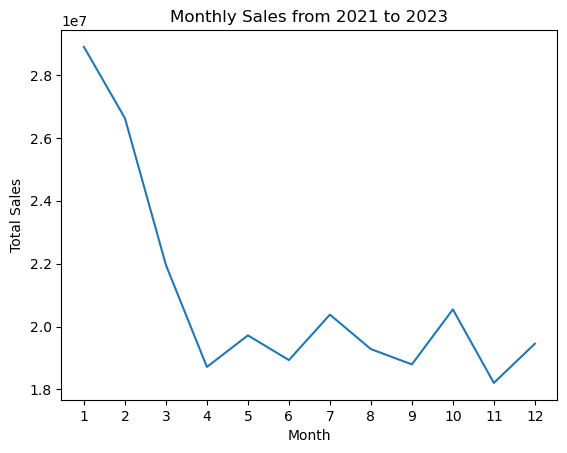

In [255]:
sales_data['invoice_date'] = pd.to_datetime(sales_data['invoice_date'], format='%d/%m/%Y')
monthly = sales_data.groupby(sales_data['invoice_date'].dt.month).sum(numeric_only=True)

y = monthly['total_sales']
x = monthly.index

plt.plot(x,y)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales from 2021 to 2023')
plt.xticks(range(1,13),labels=['1','2','3','4','5','6','7','8','9','10','11','12'])

plt.show()

HARD

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [247]:
def age_group(age):
    if 10 <= age < 20:
        return '10-19'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif 70 <= age < 80:
        return '70-79'
    elif 80 <= age < 90:
        return '80-89'
    else:
        return 'NaN'

sales_data['age_range'] = sales_data[['age']].apply(lambda sales_data: age_group(sales_data['age']),axis=1)
sales_data['age_range']
table = sales_data.pivot_table(values='price', index=['age_range'], columns=['category'], aggfunc='sum')
table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
10-19,3469.35,518238.16,29681.80,3645.31,274277.69,3296.13,287700.0,17203.20
20-29,21619.05,2818351.36,165079.60,20428.38,1630061.72,15295.92,1426950.0,102466.56
30-39,22997.70,3074919.76,198054.86,23744.20,1912141.62,17548.08,1669500.0,115297.28
40-49,23361.30,3066817.60,181343.60,24460.71,1889335.16,17759.22,1630650.0,106910.72
50-59,20664.60,2803647.44,160932.28,19999.52,1591650.84,15084.78,1220100.0,94115.84
60-69,21513.00,2910776.00,176627.04,22190.89,1618058.32,15331.11,1529850.0,100244.48
70-79,15437.85,2117064.40,114132.62,14968.26,1210542.89,10592.19,977550.0,74475.52
80-89,7575.00,1228827.60,71236.32,8561.51,708200.60,6545.34,548100.0,43043.84
NaN,90339.45,12537042.32,751518.78,93569.93,7301068.05,72984.06,6481650.0,432947.20
